# Einleitung: Clustering

Clustering-Verfahren gehören zu den sog. *unüberwachten Machine Learning Verfahren*. Wir haben bisher eigentlich nur Beispiele der sog. *überwachten Machine Learning Verfahren* gesehen. Wie unterscheiden sich diese beiden Klassen von Machine Learning Verfahren eigentlich?

Der entscheidende Unterschied ist, dass beim *überwachten Lernen* eine Menge von Beispielen der Form

    { (input1, output1), (input2, output2), ..., (inputN, outputN) }
    
vorgegeben ist. Zum Beispiel:

* beim *Naive Bayes Klassifikator* und *k-NN Klassifikator* haben wir versucht aus
    * input  = Passagierklasse, Alter, Geschlecht eines Passagiers
    * output = Überlebender ja/nein
  zu prädizieren 


* bei der *linearen Regression* haben wir versucht aus
    * input  = km-Stand, PS-Zahl
    * output = Verkaufspreis
  zu prädizieren

Beim *unüberwachten Lernen* liegen auch Beispiele vor, aber nur inputs, also z.B.:

    { input1, input2, ..., inputN }

"Was kann man denn dann überhaupt lernen?", werden Sie sich vielleicht fragen.

Nun man kann die Struktur/Lage der Daten im Eingaberaum erlernen, wie wir es am Anfang dieses Buches schon kurz beschrieben haben:

Wo finden sich Ballungen der Inputs im Eingaberaum und wie sehen diese Ballungen (Cluster) aus?

# Auswahl eines guten Clusteringverfahrens

scikit-learn bietet uns gleich eine riesige Menge an verschiedenen Clustering-Verfahren an, darunter sind z.B.:

* k-Means
* Affinity propagation
* Mean-shift
* Spektrales Clustering
* Hierarchiches Clustering
* Agglomeratives Clustering
* DBSCAN
* OPTICS
* Gauss-Misch-Modelle

Man könnte also alleine ein Buch schreiben nur über Clustering-Verfahren. Es gibt sprichwörtlich Hunderte von verschiedenen Clustering-Algorithmen!

Lassen Sie uns das abkürzen. Schauen Sie sich selber mal die folgende Seite an:

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

Dort finden Sie einen sehr gut gemachten Vergleich zwischen den in scikit-learn zur Verfügung stehenden Clusteringverfahren auf einigen *toy datasets* = *Spielzeugdatensätzen*. Diese *toy datsets* spiegeln jedoch interessante Situationen wieder, wie sie auch in realen Datensätzen vorkommen.

Welches Verfahren würden Sie nun auswählen? Welches hat die beste Anzahl an Clustern und die beste Zuordnung der Datenpunkte zu Clustern gefunden?

Ich würde sagen: *DBSCAN*. Und wahrscheinlich bin ich mit dieser Meinung nicht ganz alleine, denn dieses Verfahren hat sich in den letzten Jahren als Standardverfahren für Clustering-Aufgaben entwickelt.

# Testdaten für DBSCAN

Die meisten Einführungen zum Clustering erzeugen künstliche Testdaten mittels einer kleinen Hilfsfunktion. Wäre es aber nicht schön, wenn man rasch unterschiedlichste Fälle die man im Kopf hat "zeichnen" könnte?

Genau das wollen wir im Folgenden erlauben. Sie können in einem Zeichenprogramm ihrer Wahl einfach einen Testdatensatz zeichnen!

Erzeugen Sie dazu:
- ein neues Bild mit schwarzem Hintergrund
- setzen Sie einen weißen Pixel bzw. zeichnen Sie einen größeren weißen Bereich, wenn hier Datenpunkte vorliegen sollen

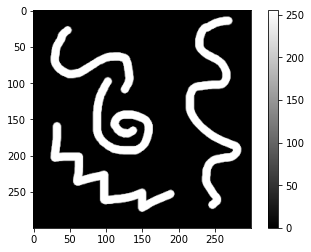

In [1]:
import cv2
img = cv2.imread("daten/02_clustering/daten1.png", cv2.IMREAD_GRAYSCALE)

from matplotlib import pyplot as plt
plt.imshow(img, cmap="gray")
plt.colorbar()
plt.show()

Hier ein kleines Beispiel eines noch unbekannten deutschen Künstlers namens *Brauer*.

Es handelt sich erstmal um ein 300 x 300 Pixelbild mit einem Graufstufenkanal:

In [2]:
img.shape

(300, 300)

In der Zeile mit Index 200 finden sich z.B. folgende Graustufenwerte:

In [3]:
img[200]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 168, 254,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 170,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

Wir tasten dieses Bild im Folgenden einfach auf einem regelmäßigen Gitter ab und schauen jeweils, ob der Pixel unter dem Gitterpunkt schwarz ist (=0) oder nicht (>0).

Ist er schwarz, sagen wir, hier liegt kein Datenpunkt vor, sonst soll hier ein Datenpunkt vorliegen:

In [4]:
bsp_daten = []
step_size = 2
for y in range(0, img.shape[0], step_size):
    for x in range(0, img.shape[1], step_size):        
        if img[y][x] > 0 :
            bsp_daten.append( (x,y) )
            
print("Anzahl von Datenpunkten: ", len(bsp_daten))

Anzahl von Datenpunkten:  3572


In [5]:
bsp_daten[:10]

[(256, 10),
 (258, 10),
 (260, 10),
 (262, 10),
 (264, 10),
 (266, 10),
 (268, 10),
 (270, 10),
 (272, 10),
 (250, 12)]

Plotten wir jetzt mal nur diese Datenpunkte:

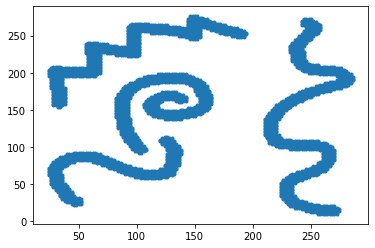

In [7]:
x = [p[0] for p in bsp_daten]
y = [p[1] for p in bsp_daten]

plt.scatter(x,y, marker=".")
plt.show()

Beachten Sie die scheinbare Spiegelung der y-Achse, denn während bei `imshow()` oben links der Ursprung `(0,0)` des Koordinatensystems liegt, wird bei normalen Matplotlib-Diagrammen der Ursprung `(0,0)` unten links positioniert. Aber das ist für unsere Tests egal.

Wir haben jetzt auf jeden Fall einen interessanten Testfall. Ein Clusteringalgorithmus sollte hier wünschenswerter Weise vier Cluster erkennen und Punkte, die zusammenhängend sind auch dem gleichen Cluster zuordnen.

# Clustern der Testdaten

Unsere Testdaten packen wir jetzt in ein 2D Inputarray `I`:

In [8]:
import numpy as np

nr_points = len(x)

I = np.zeros( (nr_points,2) )
I[:,0] = x
I[:,1] = y

In [9]:
I

array([[256.,  10.],
       [258.,  10.],
       [260.,  10.],
       ...,
       [148., 276.],
       [150., 276.],
       [152., 276.]])

Jetzt erzeugen wir erstmal einen DBSCAN Clusterer und lassen diesen Clusterer gleich die Anzahl der Cluster und die Zuordnungen der Punkte zu den Clustern berechnen:

In [12]:
from sklearn.cluster import DBSCAN

epsilon = 10.0
min_samples = 50

clusterer = DBSCAN(eps=epsilon, min_samples=min_samples)

clusterer.fit(I)

DBSCAN(eps=10.0, min_samples=50)

Für jeden der Beispieldatenpunkte gibt es jetzt eine Clusterzuordnung, ein *Label*:

In [13]:
labels = clusterer.labels_
labels

array([0, 0, 0, ..., 3, 3, 3])

Die Länge des Label-Arrays und die Anzahl der Beispieldatenpunkte sollte also übereinstimmen:

In [14]:
len(labels)

3572

In [15]:
len(bsp_daten)

3572

Wieviele verschiedene Labels bzw. Cluster wurden denn gefunden?

In [16]:
unique_labels = np.unique( labels )

# Anzahl der Cluster, aber ignoriere "noise cluster" -1, wenn es ihn denn gibt
nr_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

print("Labels:", unique_labels)
print("Anzahl der Cluster ohne Noise Cluster: ", nr_clusters)

Labels: [0 1 2 3]
Anzahl der Cluster ohne Noise Cluster:  4


Das DBSCAN Verfahren erlaubt es auch *Ausreißer* zu identifizieren. Diese erhalten dann das Label -1. Wieviele der Datenpunkte wurden denn als Ausreißer erkannt?

In [17]:
nr_noise = list(labels).count(-1)

In [18]:
nr_noise

0

Jetzt zeichnen wir nochmal alle Datenpunkte. Jeder Punkt soll jetzt aber durch eine andere Farbe dargestellt werden.

Dazu hinterlegen wir ein Python Dictionary, dass ein Clusterlabel wie -1, 0, 1, etc. auf eine Farbe abbildet und erzeugen dann eine Liste `color_per_data_point` in der wir für jeden Datenpunkt speichern mit welcher Farbe er gezeichnet werden soll:

In [19]:
LABEL_TO_COLOR_DIC = {-1 : "black",
                      0  : "red",
                      1  : "green",
                      2  : "blue",
                      3  : "cyan",
                      4  : "orange",
                      5  : "brown",
                      6  : "yellow",
                      7  : "gray"                   
                   }

color_per_data_point = [LABEL_TO_COLOR_DIC[l] for l in labels]
#plt.scatter(x, y, c=label_color)

In [20]:
color_per_data_point[:5]

['red', 'red', 'red', 'red', 'red']

Jetzt können wir alle Datenpunkte mit ihrer jeweiligen Clusterfarbe zeichnen:

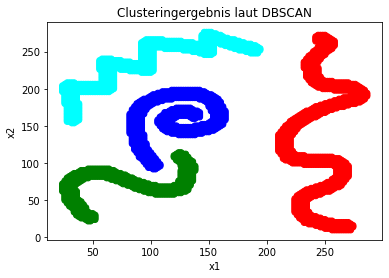

In [21]:
plt.scatter(I[:,0], I[:,1], c=color_per_data_point, marker="o")
plt.title("Clusteringergebnis laut DBSCAN")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Testen auf mehreren Datensätzen

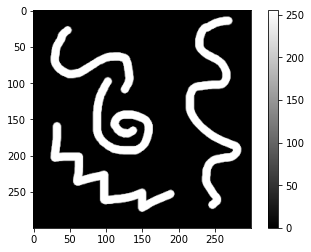

Anzahl von Datenpunkten:  3572


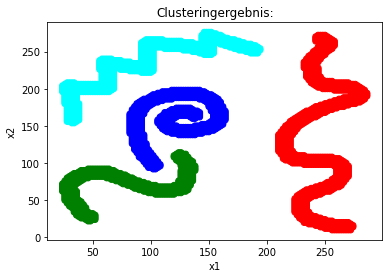

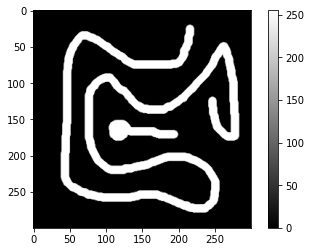

Anzahl von Datenpunkten:  4448


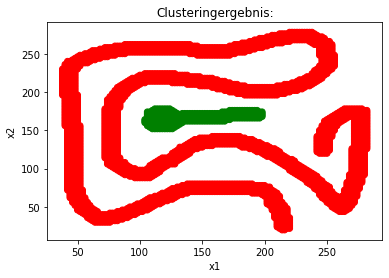

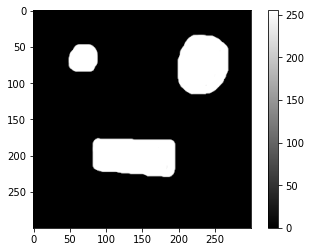

Anzahl von Datenpunkten:  2908


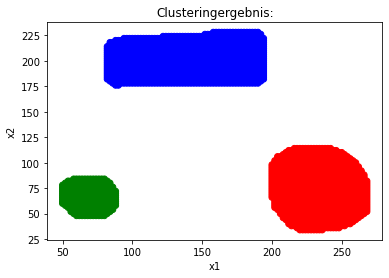

In [30]:
import cv2
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

LABEL_TO_COLOR_DIC = {-1 : "black",
                      0  : "red",
                      1  : "green",
                      2  : "blue",
                      3  : "cyan",
                      4  : "orange",
                      5  : "brown",
                      6  : "yellow",
                      7  : "gray"                   
                   }
   
def get_example_data_from_img(img):
    points = []
    step_size = 2
    for y in range(0, img.shape[0], step_size):
        for x in range(0, img.shape[1], step_size):        
            if img[y][x] > 0 :
                points.append( (x,y) )
    print("Anzahl von Datenpunkten: ", len(points))
    return points
        
def visualize_clustering_results(I, clusterer):
    labels = clusterer.labels_
    color_per_data_point = [LABEL_TO_COLOR_DIC[l] for l in labels]

    plt.scatter(I[:,0], I[:,1], c=color_per_data_point, marker="o")
    plt.title("Clusteringergebnis:")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()
 

root = "daten/02_clustering/"

#clusterer_to_use = "k-means"
clusterer_to_use = "dbscan"

dic_test_imgs = {"daten1.png": 4,
                 "daten2.png": 2,
                 "daten3.png": 3}

for test_img_name in dic_test_imgs:
    
    # 1. read in image
    img = cv2.imread(root+test_img_name, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap="gray")
    plt.colorbar()
    plt.show()

    # 2. img --> points    
    points = get_example_data_from_img(img)
    
    # 3. show generated example points
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    #plt.scatter(x,y, marker=".")
    #plt.show()
    
    # 4. list of example points --> 2D matrix
    nr_points = len(points)
    I = np.zeros( (nr_points,2) )
    I[:,0] = x
    I[:,1] = y

    # 4. cluster data
    if clusterer_to_use == "dbscan":
        epsilon = 10.0 
        min_samples = 50
        clusterer = DBSCAN(eps=epsilon, min_samples=min_samples)
    elif clusterer_to_use == "k-means":
        k = cluster_per_test_image[test_img_name]
        clusterer = KMeans(n_clusters=k, random_state=0)    
    clusterer.fit(I)
    
    # 5. show clustering results
    visualize_clustering_results(I, clusterer)